Inputs

In [60]:

import matplotlib.pyplot as plt
import numpy as np

# Wire Dimensions
wire_gauges = np.arange(5, 30, 1)

#Wire Properties
material_names = ['Copper @ 20C', 'Copper @ 76.85']
material_densities = [8960, 8960] #https://www.engineersedge.com/materials/densities_of_metals_and_elements_table_13976.htm
material_resistivities = [1.676e-8, 2.061e-8] #https://srd.nist.gov/JPCRD/jpcrd155.pdf

#Power Properties
average_currents = [6, 3, 1] #Range of expected currents
power_loss_per_kg = 2.5 #Constant found from a previous project

#AWS Gauge to Area dictionary (mm²) (https://www.sab-cable.com/cables-wires-harnessing-temperature-measurement/technical-data/cables-and-wires/american-cable-stranding.html)
gauge_to_area = {
    30 : 0.0503,
    29 : 0.0646,
    28 : 0.0804,
    27 : 0.1020,
    26 : 0.1280,
    25 : 0.1630,
    24 : 0.2050,
    23 : 0.2590,
    22 : 0.3240,
    21 : 0.4120,
    20 : 0.5190,
    19 : 0.6530,
    18 : 0.8230,
    17 : 1.04,
    16 : 1.31,
    15 : 1.65,
    14 : 2.08,
    13 : 2.63,
    12 : 3.31,
    11 : 4.15,
    10 : 5.26,
    9 : 6.62,
    8 : 8.34,
    7 : 10.6,
    6 : 13.3,
    5 : 16.8
}


Resistivity (p) = Resistance (R) * Cross Sectional Area (A) / Length (L)

R = pL/A 

Power Loss From Resistance = I² * R = I² * (pL/A)

Mass (m) = density (d) * A * L

Power Loss From Mass = mk = dAL * 2.5 W/kg (Constant found from previous project)

Total Power Loss = I²pL/A + 2.5*dAL

Total Power Loss / L = I²p/A + 2.5*dA

Optimized gauge for Copper @ 20C at 6A is 10
Optimized gauge for Copper @ 20C at 3A is 13
Optimized gauge for Copper @ 20C at 1A is 18
Optimized gauge for Copper @ 76.85 at 6A is 10
Optimized gauge for Copper @ 76.85 at 3A is 13
Optimized gauge for Copper @ 76.85 at 1A is 17


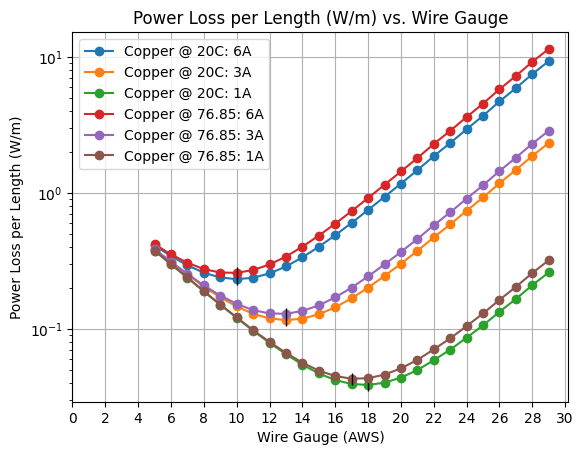

In [ ]:

for i in range(len(material_names)):
    total_power_losses = []
    power_losses_resistance = []
    power_losses_mass = []

    mat_resistivity = material_resistivities[i]
    mat_density = material_densities[i]
    mat_name = material_names[i]

    for current in average_currents:
        total_power_losses = []

        for gauge in wire_gauges:
            cross_sectional_area = gauge_to_area[gauge] * 1e-6 # Converts mm² to m²

            power_loss_resistance = current * current * mat_resistivity / cross_sectional_area # P1 = I² * (p/A)
            power_loss_mass = mat_density * cross_sectional_area * power_loss_per_kg # P2 = dA*2.5

            total_power_losses.append(power_loss_mass + power_loss_resistance)

        plt.plot(wire_gauges, total_power_losses,  marker='o', label = f"{mat_name}: {current}A")

        minimum_power_loss = np.min(total_power_losses) #Finds the minimum power loss and associated gauge
        minimum_power_loss_gauge = wire_gauges[np.argmin(total_power_losses)]

        plt.plot(minimum_power_loss_gauge, minimum_power_loss, marker = '|', markersize = 8, color="black") #Marks the minimum value with a black line
        print(f"Optimized gauge for {mat_name} at {current}A is {minimum_power_loss_gauge}")


plt.title('Power Loss per Length (W/m) vs. Wire Gauge')

plt.ylabel("Power Loss per Length (W/m)")
plt.xlabel("Wire Gauge (AWS)")
plt.legend()

plt.yscale('log')

plt.xlim(0)

plt.xticks(np.arange(0, 31, 2))
plt.grid()

plt.show()


    